<h1 style='color: #C9C9C9'>Machine Learning with Python<img style="float: right; margin-top: 0;" width="240" src="../../Images/cf-logo.png" /></h1> 
<p style='color: #C9C9C9'>&copy; Coding Fury 2022 - all rights reserved</p>

<hr style='color: #C9C9C9' />

# Multiple Linear Regression Lab 01 : BodyFat

A medical study aims to be able to predict the bodyfat of individuals based on skin thickness at three parts of their body. 

We start by reading in the data and checking for correlations. 

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [5]:
bodyfat_df = pd.read_csv('../../Data/bodyfat.txt', delimiter='\t')
bodyfat_df

,Triceps,Thigh,Midarm,Bodyfat
0,19.5,43.1,29.1,11.9
1,24.7,49.8,28.2,22.8
2,30.7,51.9,37.0,18.7
3,29.8,54.3,31.1,20.1
4,19.1,42.2,30.9,12.9
5,25.6,53.9,23.7,21.7
6,31.4,58.5,27.6,27.1
7,27.9,52.1,30.6,25.4
8,22.1,49.9,23.2,21.3
9,25.5,53.5,24.8,19.3


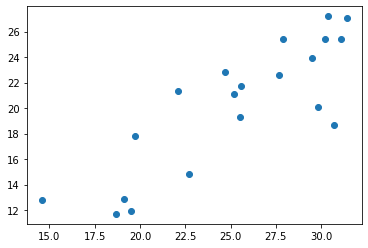

In [6]:
plt.scatter(bodyfat_df['Triceps'],bodyfat_df['Bodyfat'])

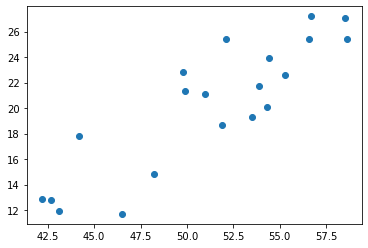

In [7]:
plt.scatter(bodyfat_df['Thigh'],bodyfat_df['Bodyfat'])

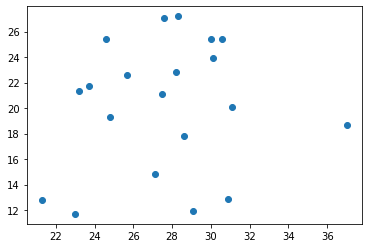

In [8]:
plt.scatter(bodyfat_df['Midarm'],bodyfat_df['Bodyfat'])

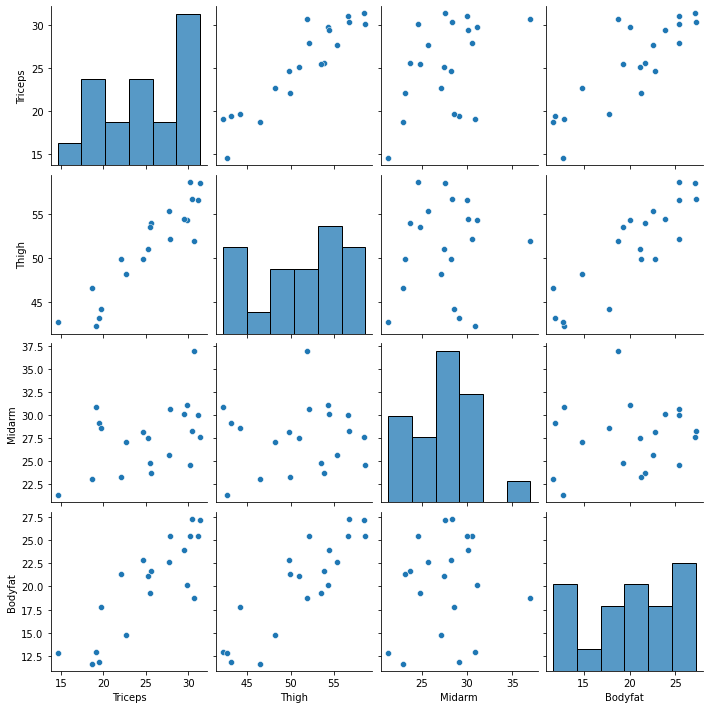

In [9]:
import seaborn as sns
sns.pairplot(bodyfat_df)

There are definitely strong correlations when measuring skin thickness of triceps and thigh. It's less clear if the midarm skin thickness has a correlation to overall bodyweight, but as this is a Multiple Linear Regresssion Example we're going to go ahead and use it anyway. 

# Question: 

Train a Multiple Linear Regression model and make predictions of bodyfat for: 

|Triceps|Thigh|Midarm|
|-------|-----|------|
|30.1|55.2|29.4|
|20.2|43.9|27.2|
|16.3|43.2|22.4|


### Steps

Do you remember the four steps for machine learning with SciKit Learn? 

```
1. from sckitlearn.module import Model
2. model = Model()
3. model.fit(X,y)
4. predictions = model.predict(new_X) 
````
### Rules

Do you remember the rules of Machine Learning with SciKit Learn?

SciKit Learn requires:
1. numerical data
2. no missing data
3. a numpy array of data

Let's quickly test if our dataset meets these criteria

In [11]:
bodyfat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Triceps  20 non-null     float64
 1   Thigh    20 non-null     float64
 2   Midarm   20 non-null     float64
 3   Bodyfat  20 non-null     float64
dtypes: float64(4)
memory usage: 768.0 bytes


In [10]:
from sklearn.linear_model import LinearRegression

In [12]:
model = LinearRegression()

In [14]:
X = bodyfat_df.drop('Bodyfat', axis='columns').values
X

array([[19.5, 43.1, 29.1],
       [24.7, 49.8, 28.2],
       [30.7, 51.9, 37. ],
       [29.8, 54.3, 31.1],
       [19.1, 42.2, 30.9],
       [25.6, 53.9, 23.7],
       [31.4, 58.5, 27.6],
       [27.9, 52.1, 30.6],
       [22.1, 49.9, 23.2],
       [25.5, 53.5, 24.8],
       [31.1, 56.6, 30. ],
       [30.4, 56.7, 28.3],
       [18.7, 46.5, 23. ],
       [19.7, 44.2, 28.6],
       [14.6, 42.7, 21.3],
       [29.5, 54.4, 30.1],
       [27.7, 55.3, 25.7],
       [30.2, 58.6, 24.6],
       [22.7, 48.2, 27.1],
       [25.2, 51. , 27.5]])

In [17]:
y = bodyfat_df['Bodyfat'].values
y

array([11.9, 22.8, 18.7, 20.1, 12.9, 21.7, 27.1, 25.4, 21.3, 19.3, 25.4,
       27.2, 11.7, 17.8, 12.8, 23.9, 22.6, 25.4, 14.8, 21.1])

In [18]:
model.fit(X, y)

LinearRegression()

## What is the line of best fit equation?

In [19]:
model.coef_

array([ 4.33409201, -2.85684794, -2.18606025])

In [20]:
model.intercept_

117.08469477512608

# Make predictions

In [22]:
import numpy as np
X_new = np.array([[30.1,55.2, 29.4],[20.2,43.9, 27.2], [16.3, 43.2, 22.4]])

In [24]:
model.predict(X)

array([14.85498956, 20.21884106, 20.98668223, 23.12731986, 11.75760745,
       22.24371846, 25.71431662, 22.27064063, 19.5948183 , 20.54838216,
       24.5955555 , 24.99230872, 15.00940051, 13.67230536, 11.81194786,
       23.72746772, 22.97360407, 26.78590217, 18.52628002, 20.48791172])